In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 1\\utils.py'>

In [2]:
#Load ALL THE DATA
spectrum_dict = utils.load_data(filepath=r'Data/Transmittance/Water-vapor.ASC', key='Water Vapor')
spectrum_dict.update(utils.load_data(r'Data/Transmittance/polystyrene.ASC', key='Polystyrene'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/glass.ASC', key ='Glass'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/NaCl blocking filter.ASC', key='NaCl'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/water vapor with plate.ASC', key='Water Vapor with Plate'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/AlO2 transmittance.ASC', key='Sapphire Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/Si transmission try 2.ASC', key='Silicon Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/ZnO front try 1.ASC', key='Zinc Oxide Front'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC', key='Gold Mirror Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/AlO2 Reflectivity full range.ASC', key='Sapphire Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Silicone reflectivity spectrum.ASC', key='Silicone Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/ZnO thin film reflectivity.ASC', key='Zinc Oxide Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/GaAs reflectivity spectrum.ASC', key='Gallium Arsenide Reflectivity'))
print(spectrum_dict.keys())




dict_keys(['Water Vapor', 'Polystyrene', 'Glass', 'NaCl', 'Water Vapor with Plate', 'Sapphire Transmittance', 'Silicon Transmittance', 'Zinc Oxide Front', 'Gold Mirror Reflectivity', 'Sapphire Reflectivity', 'Silicone Reflectivity', 'Zinc Oxide Reflectivity', 'Gallium Arsenide Reflectivity'])


In [3]:
spectrum_dict = utils.normalize(spectrum_dict)
print(spectrum_dict['Water Vapor'].head())

Data for Water Vapor successfully normalized

Data for Polystyrene successfully normalized

Data for Glass successfully normalized

Data for NaCl successfully normalized

Data for Water Vapor with Plate successfully normalized

Data for Sapphire Transmittance successfully normalized

Data for Silicon Transmittance successfully normalized

Data for Zinc Oxide Front successfully normalized

Data for Gold Mirror Reflectivity successfully normalized

Data for Sapphire Reflectivity successfully normalized

Data for Silicone Reflectivity successfully normalized

Data for Zinc Oxide Reflectivity successfully normalized

Data for Gallium Arsenide Reflectivity successfully normalized

   Wavenumber  Intensity  Normalized Intensity
0      4000.0  55.263495              0.721805
1      3999.0  55.277896              0.721993
2      3998.0  55.277162              0.721984
3      3997.0  55.268043              0.721865
4      3996.0  55.264194              0.721814


In [4]:
# Manually input expected trough wavenumbers
# Create a blank dictionary to hold the trough data
trough_dict = {}
expected_troughs_vapor_trans = [1942.6, 1869.3, 1844.2, 1791.8, 1732, 1652.8, 1576.2, 1521.4, 1456.8, 1436.7, 1419.3, 1387.5, 502.3, 472.3, 457.8, 400.4, 302.4, 278.3, 266.2, 253.9]
actual_troughs_vapor_trans = [None] * len(expected_troughs_vapor_trans)
trough_dict['Water Vapor'] = pd.DataFrame({
    'Expected Trough': expected_troughs_vapor_trans,
    'Actual Trough': actual_troughs_vapor_trans
})

expected_troughs_polystyrene_trans = [3081.5, 3059.5, 3025.6, 2922.3, 2850.3, 1942.6, 1802.4, 1601.4, 1583.1, 1452.3, 1181.5, 1154.5, 1069.0, 1028.5, 906.9, 699.8, 541.0]
actual_troughs_polystyrene_trans = [None] * len(expected_troughs_polystyrene_trans)
trough_dict['Polystyrene'] = pd.DataFrame({
    'Expected Trough': expected_troughs_polystyrene_trans,
    'Actual Trough': actual_troughs_polystyrene_trans
})



In [5]:
trough_dict['Water Vapor'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Water Vapor',
    trough_dict=trough_dict,
    window=3
)
trough_dict['Water Vapor']['Offset'] = trough_dict['Water Vapor']['Actual Trough'] - trough_dict['Water Vapor']['Expected Trough']

### For Debug
#print(trough_dict['Water Vapor'].head(20))

trough_dict['Polystyrene'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Polystyrene',
    trough_dict=trough_dict,
    window=3
)

trough_dict['Polystyrene']['Offset'] = trough_dict['Polystyrene']['Actual Trough'] - trough_dict['Polystyrene']['Expected Trough']

### For Debug
#print(trough_dict['Polystyrene'].head(20))


# for key in trough_dict:
#     trough_dict[key] = find_troughs_simple(spectrum_dict, key, trough_dict, window=10)

In [6]:
type(trough_dict)

dict

In [7]:
for key, data in trough_dict.items():
    trough_dict[key]['Normalized Intensity'] = trough_dict[key]['Intensity'] / max(spectrum_dict[key]['Intensity'])
    print(trough_dict[key].head(20))

    Expected Trough Actual Trough  Intensity Offset  Normalized Intensity
0            1942.6        1943.0  71.977392    0.4              0.940108
1            1869.3        1869.0  67.891100   -0.3              0.886736
2            1844.2        1844.0  65.612091   -0.2              0.856970
3            1791.8        1792.0  63.387795    0.2              0.827918
4            1732.0        1734.0  52.709479    2.0              0.688447
5            1652.8        1653.0  42.157645    0.2              0.550628
6            1576.2        1576.0  50.455120   -0.2              0.659002
7            1521.4        1521.0  46.739418   -0.4              0.610471
8            1456.8        1457.0  42.014492    0.2              0.548758
9            1436.7        1437.0  48.198422    0.3              0.629527
10           1419.3        1419.0  47.554124   -0.3              0.621112
11           1387.5        1387.0  50.669842   -0.5              0.661807
12            502.3         501.0   3.

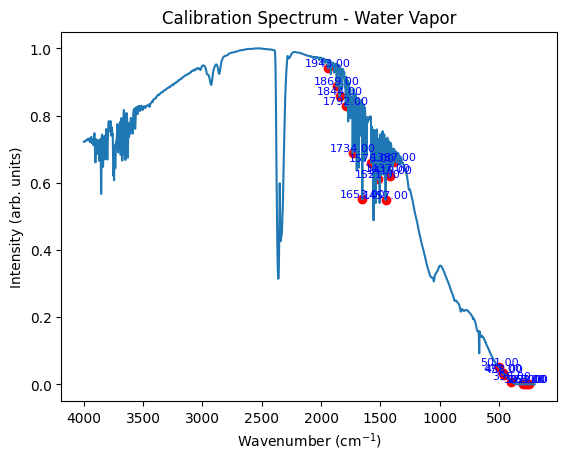

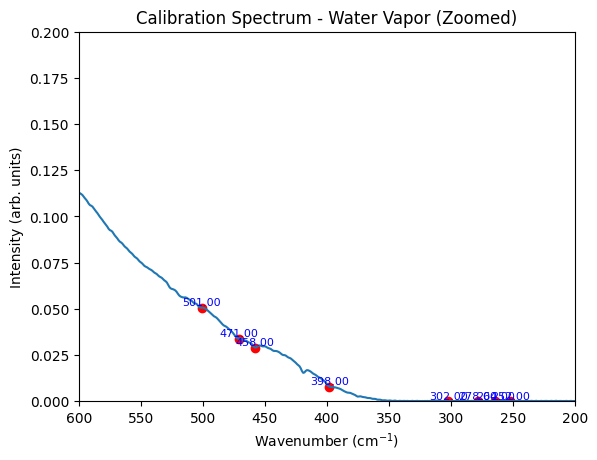

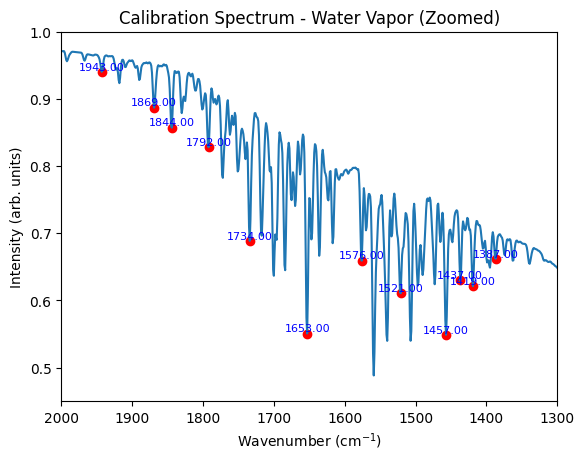

In [8]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Normalized Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Normalized Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.xlim(200, 600)
plt.ylim(0, 0.2)
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity']):
            if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Normalized Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Normalized Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.xlim(1300, 2000)
plt.ylim(0.45, 1)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

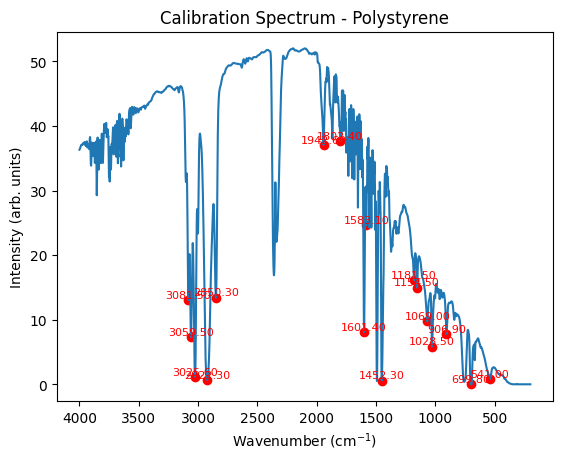

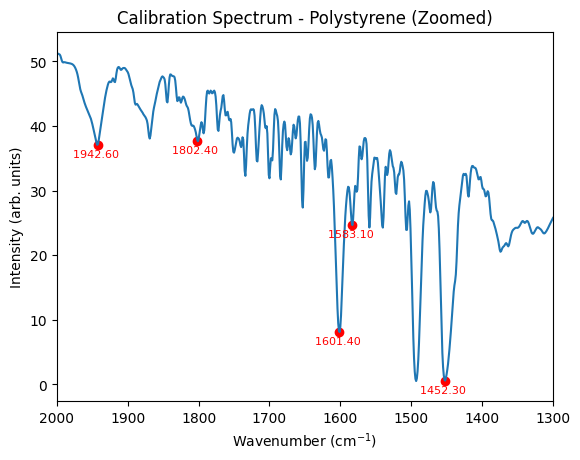

In [9]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
# plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
# plt.xlabel('Wavenumber (cm$^{-1}$)')
# plt.ylabel('Intensity (arb. units)')
# plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
# plt.xlim(200, 600)
# plt.ylim(0, 10)
# plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
# for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
#             if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
#                 plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
# plt.gca().invert_xaxis()  # If you want to keep the axis inverted
# plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y-4, f"{x:.2f} \n", fontsize=8, ha='center', va='bottom', color='red')
plt.xlim(1300, 2000)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

Slope: 0.0006803299446164669, Intercept: -1.2187692704385258


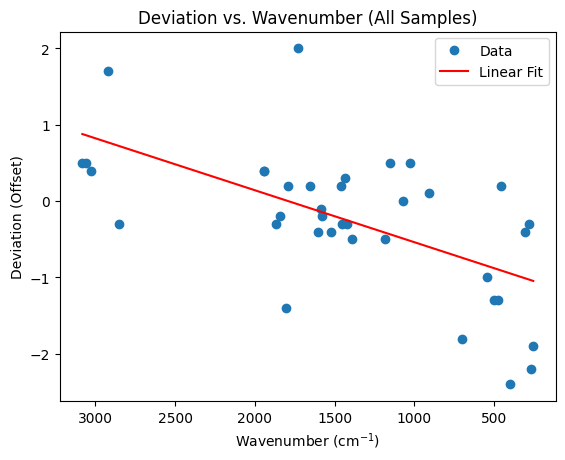

In [10]:
# Combine values from both keys
wavenumbers = trough_dict['Water Vapor']['Expected Trough'].tolist() + trough_dict['Polystyrene']['Expected Trough'].tolist()
deviations = trough_dict['Water Vapor']['Offset'].tolist() + trough_dict['Polystyrene']['Offset'].tolist()
def linear(x, m, b):
    return m * x + b

def fit_line(x, y):
    """Fit a linear line to the data."""
    m, b = np.polyfit(x, y, 1)
    return m, b

wavenumbers_np = np.array(wavenumbers)
deviations_np = np.array(deviations)

#Run the wavenumbers and deviations through the linear fit function
m, b = fit_line(wavenumbers_np, deviations_np)
print(f"Slope: {m}, Intercept: {b}")
# Sort for a clean line plot
sort_idx = np.argsort(wavenumbers_np)
wavenumbers_sorted = wavenumbers_np[sort_idx]
deviations_sorted = deviations_np[sort_idx]



# Plot combined data
plt.plot(wavenumbers_sorted, deviations_sorted, 'o', label='Data')
plt.plot(wavenumbers_sorted, linear(wavenumbers_sorted, m, b), color='red', label='Linear Fit')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Deviation (Offset)')
plt.title('Deviation vs. Wavenumber (All Samples)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [11]:
for key in ['Glass', 'NaCl']:
    # Merge with Water Vapor on Wavenumber to align the data
    merged = pd.merge(
        spectrum_dict[key][['Wavenumber', 'Normalized Intensity']],
        spectrum_dict['Water Vapor'][['Wavenumber', 'Normalized Intensity']],
        on='Wavenumber',
        suffixes=('', '_WaterVapor')
    )
    # Create the ratio column
    spectrum_dict[key]['NormDivWaterVapor'] = merged['Normalized Intensity'] / merged['Normalized Intensity_WaterVapor']

In [12]:
spectrum_dict_sliced = {}

for key, data in spectrum_dict.items():
    if 'NormDivWaterVapor' not in data.columns:
        continue
    else:
        spectrum_dict_sliced[key] = utils.noise_cutoff_snr(data, window=25, noise_std_thresh=0.002)\

print(spectrum_dict_sliced)

{'Glass':       Wavenumber  Intensity  Normalized Intensity  NormDivWaterVapor
0         4000.0  42.589485              0.945010           1.309231
1         3999.0  42.597650              0.945191           1.309141
2         3998.0  42.593925              0.945108           1.309044
3         3997.0  42.584027              0.944888           1.308955
4         3996.0  42.578766              0.944772           1.308885
...          ...        ...                   ...                ...
3576       424.0   0.002471              0.000055           0.002738
3577       423.0   0.002408              0.000053           0.002746
3578       422.0   0.002926              0.000065           0.003439
3579       421.0   0.004342              0.000096           0.005422
3580       420.0   0.006244              0.000139           0.008526

[3581 rows x 4 columns], 'NaCl':       Wavenumber  Intensity  Normalized Intensity  NormDivWaterVapor
0         4000.0  45.983849              0.707139          

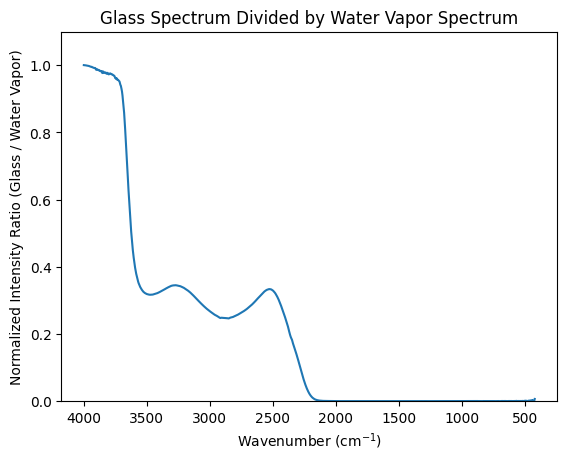

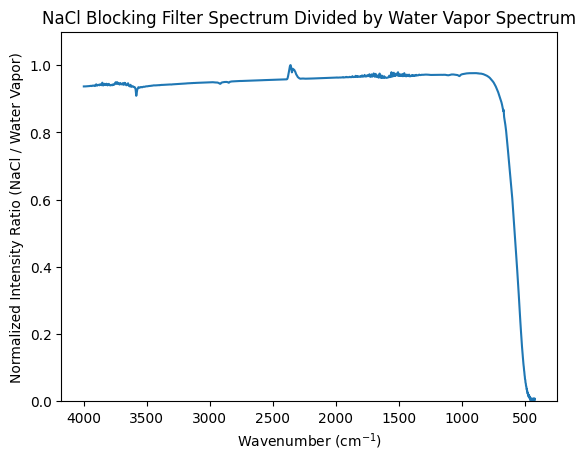

In [13]:
#Create a plot of the glass spectrum divided by the water vapor spectrum
plt.plot(spectrum_dict_sliced['Glass']['Wavenumber'], spectrum_dict_sliced['Glass']['NormDivWaterVapor']/spectrum_dict_sliced['Glass']['NormDivWaterVapor'].max())
plt.xlabel('Wavenumber (cm$^{-1}$)')
#plt.xlim(xmin=375)
plt.ylim(ymin=0, ymax=1.1)
plt.ylabel('Normalized Intensity Ratio (Glass / Water Vapor)')
plt.title('Glass Spectrum Divided by Water Vapor Spectrum')
plt.gca().invert_xaxis()
plt.show()

#Create a plot of the NaCl blocking filter spectrum divided by the water vapor spectrum
plt.plot(spectrum_dict_sliced['NaCl']['Wavenumber'], spectrum_dict_sliced['NaCl']['NormDivWaterVapor']/spectrum_dict_sliced['NaCl']['NormDivWaterVapor'].max())
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Intensity Ratio (NaCl / Water Vapor)')
plt.title('NaCl Blocking Filter Spectrum Divided by Water Vapor Spectrum')
plt.ylim(ymin=0, ymax=1.1)
plt.gca().invert_xaxis()
plt.show()

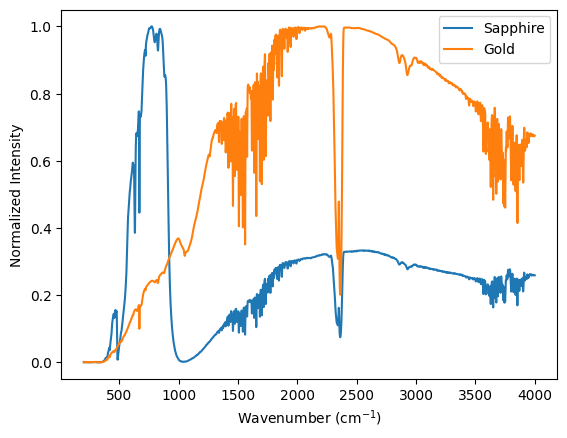

In [14]:
sapphire_x = spectrum_dict['Sapphire Reflectivity']['Wavenumber']
sapphire_y = spectrum_dict['Sapphire Reflectivity']['Normalized Intensity']
gold_x = spectrum_dict['Gold Mirror Reflectivity']['Wavenumber']
gold_y = spectrum_dict['Gold Mirror Reflectivity']['Normalized Intensity']

plt.plot(sapphire_x, sapphire_y, label='Sapphire')
plt.plot(gold_x, gold_y, label='Gold')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.show()

### Don't think we need this smoothed plot

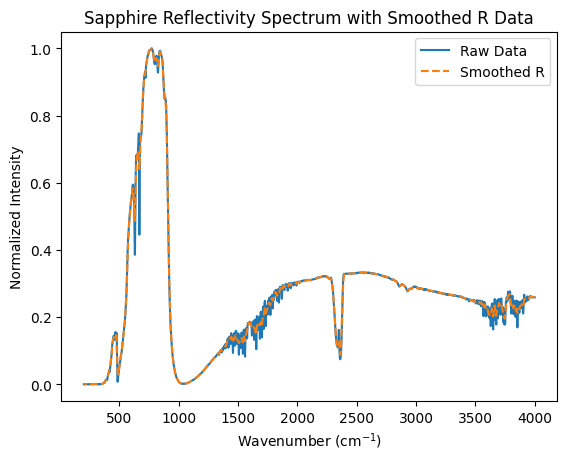

In [15]:
from scipy.ndimage import gaussian_filter1d
# Apply Gaussian smoothing
sigma = 2  # Standard deviation of the Gaussian kernel
smoothed_Y = gaussian_filter1d(spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'], sigma=sigma)
for i in range(0, 5):
    smoothed_Y = gaussian_filter1d(smoothed_Y, sigma=sigma)


#Plot the sapphire reflectivity spectrum and the smoothed R data on the same plot
plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'], label='Raw Data')
plt.plot(spectrum_dict['Sapphire Reflectivity']['Wavenumber'], smoothed_Y, label='Smoothed R', linestyle='--')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Normalized Intensity')
plt.title('Sapphire Reflectivity Spectrum with Smoothed R Data')
plt.legend()
plt.show()

In [28]:
# eps_inf_fixed = 1.64

# # Tighter bounds around latest fit
# S1_bounds = (1.32, 1.42)
# w01_bounds = (636, 642)
# g1_bounds = (8.8, 11.5)

# S3_bounds = (0.20, 0.29)
# w03_bounds = (672, 675)   # basically fixed tightly
# g3_bounds = (11.0, 14.0)

# # Define dielectric function with fixed eps_inf
# def dielectric_function_refined(w, 
#                                S1, w01, g1,
#                                S3, w03, g3):
#     i = 1j
#     eps = eps_inf_fixed + \
#           S1 * w01**2 / (w01**2 - w**2 - i * g1 * w) + \
#           S3 * w03**2 / (w03**2 - w**2 - i * g3 * w)
#     return eps

# def reflectivity_model_refined(w, 
#                               S1, w01, g1,
#                               S3, w03, g3):
#     eps = dielectric_function_refined(w, S1, w01, g1, S3, w03, g3)
#     sqrt_eps = np.sqrt(eps)
#     R = np.abs((1 - sqrt_eps) / (1 + sqrt_eps))**2
#     return R.real

# # Initial guess from your last fit
# p0_refined = [
#     1.370,   # S1
#     639.014, # w01
#     9.928,   # g1
#     0.244,   # S3
#     673.508, # w03
#     12.575   # g3
# ]

# lower_bounds_refined = [
#     S1_bounds[0], w01_bounds[0], g1_bounds[0],
#     S3_bounds[0], w03_bounds[0], g3_bounds[0]
# ]

# upper_bounds_refined = [
#     S1_bounds[1], w01_bounds[1], g1_bounds[1],
#     S3_bounds[1], w03_bounds[1], g3_bounds[1]
# ]

# # Use your original data arrays
# wavenumber = np.array(spectrum_dict['Sapphire Reflectivity']['Wavenumber'])
# R_normalized = np.array(smoothed_Y)

# # Restrict to fitting range you used before
# fit_mask = (wavenumber > 300) & (wavenumber < 1000)
# w_fit = wavenumber[fit_mask]
# R_fit = R_normalized[fit_mask]

# # Run the fit
# popt_refined, pcov_refined = curve_fit(
#     reflectivity_model_refined,
#     w_fit,
#     R_fit,
#     p0=p0_refined,
#     bounds=(lower_bounds_refined, upper_bounds_refined),
#     maxfev=8000
# )

# param_names_refined = ['S1', 'w01', 'g1', 'S3', 'w03', 'g3']

# print("Refined fitted parameters (eps_inf fixed to 1.64):")
# for name, val in zip(param_names_refined, popt_refined):
#     print(f"{name} = {val:.3f}")

# # Plot final fit and dielectric function
# eps_fit_refined = dielectric_function_refined(wavenumber, *popt_refined)

# plt.figure(figsize=(8,4))
# plt.plot(wavenumber, R_normalized, label='Measured Reflectivity')
# plt.plot(wavenumber, reflectivity_model_refined(wavenumber, *popt_refined), '--', label='Refined Fit')
# plt.xlabel('Wavenumber (cm$^{-1}$)')
# plt.ylabel('Reflectivity')
# plt.gca().invert_xaxis()
# plt.legend()
# plt.title('Refined Reflectivity Fit')
# plt.show()

# plt.figure(figsize=(8,4))
# plt.plot(wavenumber, eps_fit_refined.real, label='Re(ε)')
# plt.plot(wavenumber, eps_fit_refined.imag, label='Im(ε)')
# plt.xlabel('Wavenumber (cm$^{-1}$)')
# plt.ylabel('Dielectric function')
# plt.gca().invert_xaxis()
# plt.legend()
# plt.title('Refined Dielectric Function')
# plt.show()


Fitted parameters:
eps_inf = 3.018
S1 = 3.221
w01 = 438.466
g1 = 1.390
S2 = 3.535
w02 = 568.180
g2 = 1.924
S3 = 0.123
w03 = 1250.690
g3 = 427.282


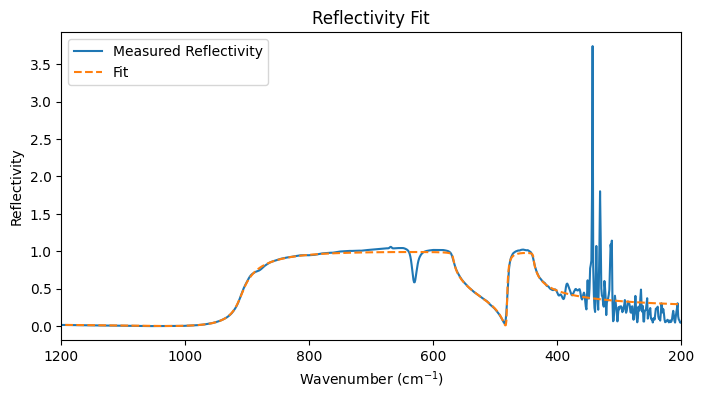

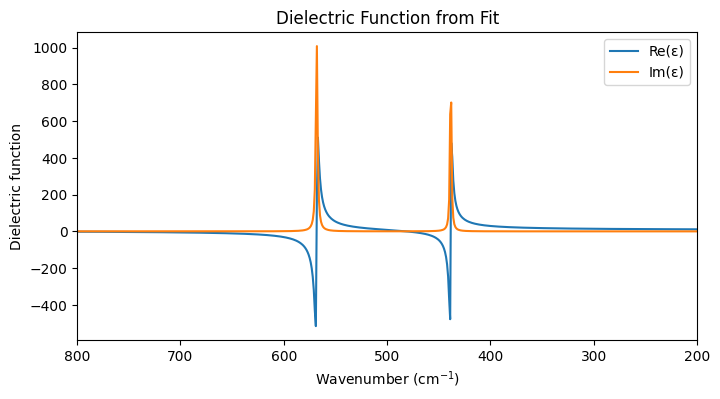

In [36]:
# Define dielectric function separately (Lorentz oscillators)
def dielectric_function(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3):
    i = 1j
    eps = eps_inf + \
          S1 * w01**2 / (w01**2 - w**2 - i * g1 * w) + \
          S2 * w02**2 / (w02**2 - w**2 - i * g2 * w) + \
          S3 * w03**2 / (w03**2 - w**2 - i * g3 * w)
    return eps

# Reflectivity model to fit (returns R)
def reflectivity_model(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3):
    eps = dielectric_function(w, eps_inf, S1, w01, g1, S2, w02, g2, S3, w03, g3)
    sqrt_eps = np.sqrt(eps)
    R = np.abs((1 - sqrt_eps) / (1 + sqrt_eps))**2
    return R.real  # real, since reflectivity is real-valued

# Initial parameter guesses
p0 = [
    3.018,        # eps_inf
    3.221, 438.466, 1.390,  # S1, w01, g1
    3.535, 568.180, 1.924,  # S2, w02, g2
    0.123, 1250.709, 427.433   # S3, w03, g3
]

param_names = [
    'eps_inf',
    'S1', 'w01', 'g1',
    'S2', 'w02', 'g2',
    'S3', 'w03', 'g3'
]
lower_bounds = [
    1.0,     # eps_inf min
    0.0, 200.0, 0.0,   # S1, w01, g1 min
    0.0, 400.0, 0.0,   # S2, w02, g2 min
    0.0, 1.0, 0.0   # S3, w03, g3 min
]

upper_bounds = [
    10.0,    # eps_inf max
    10.0, 900.0, 100.0,   # S1, w01, g1 max
    10.0, 1200.0, 100.0,  # S2, w02, g2 max
    10.0, 1400.0, 150000.0   # S3, w03, g3 max
]

wavenumber = np.array(spectrum_dict['Sapphire Reflectivity']['Wavenumber'])
R_normalized = np.array(spectrum_dict['Sapphire Reflectivity']['Intensity'] / spectrum_dict['Gold Mirror Reflectivity']['Intensity'])

# Optional: restrict fitting range to where phonon modes appear, e.g. 400-1300 cm^-1
fit_mask = (wavenumber > 400) & (wavenumber < 1300)
w_fit = wavenumber[fit_mask]
R_fit = R_normalized[fit_mask]

popt, pcov = curve_fit(
    reflectivity_model,
    w_fit,
    R_fit,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    maxfev=5000
)

print("Fitted parameters:")
for name, val in zip(param_names, popt):
    print(f"{name} = {val:.3f}")

# Calculate dielectric function using fitted params
eps_fit = dielectric_function(wavenumber, *popt)

# Plot reflectivity fit
plt.figure(figsize=(8,4))
plt.plot(wavenumber, R_normalized, label='Measured Reflectivity')
plt.plot(wavenumber, reflectivity_model(wavenumber, *popt), '--', label='Fit')
plt.xlim(200, 1200)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Reflectivity Fit')
plt.show()

# Plot dielectric function
plt.figure(figsize=(8,4))
plt.plot(wavenumber, eps_fit.real, label='Re(ε)')
plt.plot(wavenumber, eps_fit.imag, label='Im(ε)')
plt.xlim(200, 800)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Dielectric function')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Dielectric Function from Fit')
plt.show()


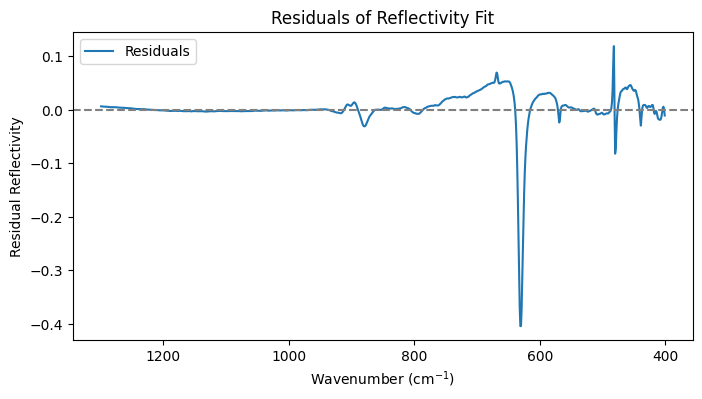

In [39]:
# Calculate residuals: difference between measured and fitted reflectivity
residuals = R_fit - reflectivity_model(w_fit, *popt)

# Plot residuals
plt.figure(figsize=(8,4))
plt.plot(w_fit, residuals, label='Residuals')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Residual Reflectivity')
plt.gca().invert_xaxis()
plt.legend()
plt.title('Residuals of Reflectivity Fit')
plt.show()


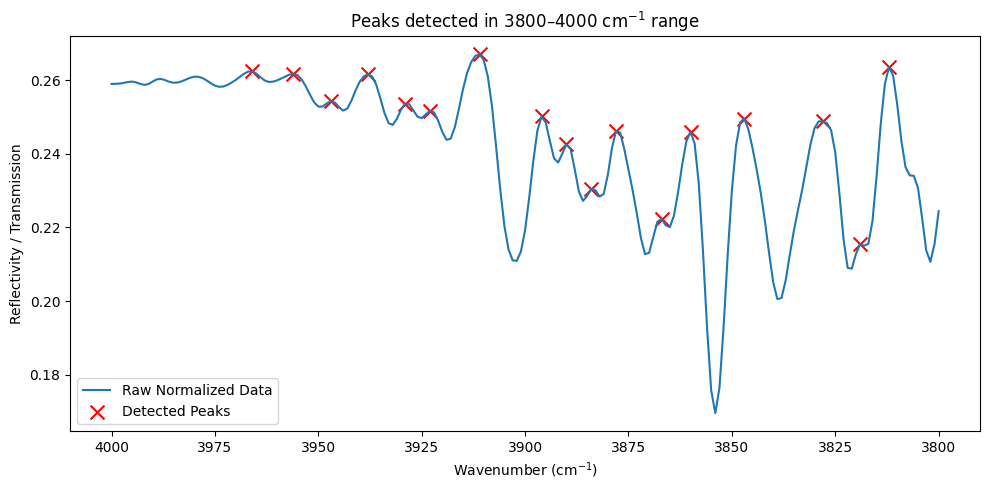

Detected peak positions (cm^-1): [3966. 3956. 3947. 3938. 3929. 3923. 3911. 3896. 3890. 3884. 3878. 3867.
 3860. 3847. 3828. 3819. 3812.]
Peak heights: [0.26232812 0.26169078 0.2542341  0.26156897 0.25362151 0.25165654
 0.26695884 0.2500989  0.24255021 0.23042886 0.24624033 0.2222936
 0.24597575 0.24954246 0.24879727 0.21541905 0.26354536]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming these are your raw data arrays
wavenumber = np.array(spectrum_dict['Sapphire Reflectivity']['Wavenumber'])
R_normalized = np.array(spectrum_dict['Sapphire Reflectivity']['Normalized Intensity'])  # Or the actual raw normalized data if available

# Define the wavenumber band for analysis
band_mask = (wavenumber >= 3800) & (wavenumber <= 3975)
w_band = wavenumber[band_mask]
R_band = R_normalized[band_mask]

plot_mask = (wavenumber >= 3800) & (wavenumber <= 4000)
plot_w = wavenumber[plot_mask]
plot_R = R_normalized[plot_mask]

# Find peaks in this band
# You can tweak 'height', 'distance', or other parameters to adjust sensitivity
peaks, properties = find_peaks(R_band, height=0.01, distance=5)  

# Plot raw data and mark detected peaks
plt.figure(figsize=(10, 5))
plt.plot(plot_w, plot_R, label='Raw Normalized Data')
plt.scatter(w_band[peaks], R_band[peaks], color='red', marker='x', s=100, label='Detected Peaks')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Reflectivity / Transmission')
plt.title('Peaks detected in 3800–4000 cm$^{-1}$ range')
plt.gca().invert_xaxis()
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print peak positions and heights
print("Detected peak positions (cm^-1):", w_band[peaks])
print("Peak heights:", R_band[peaks])


In [21]:
# delta_nu = np.diff(peak_positions)  # array of fringe spacings
# average_delta_nu = np.mean(delta_nu)
# print(f"Average fringe spacing Δν: {average_delta_nu:.3f} cm^-1")

# n_sapphire = 1.75  # approximate refractive index

# thickness_cm = 1 / (2 * n_sapphire * average_delta_nu)
# thickness_microns = thickness_cm * 1e4  # convert cm to microns

# print(f"Estimated substrate thickness: {thickness_microns:.2f} microns")

In [43]:
# Your wavenumber range for thickness calculation (3800 - 4000 cm^-1)
w_thick_mask = (wavenumber >= 3800) & (wavenumber <= 4000)
w_thick = wavenumber[w_thick_mask]

# Calculate dielectric function at these wavenumbers using your refined fit parameters
eps_thick = dielectric_function(w_thick, *popt)

# Get real part of refractive index n = sqrt(Re(eps)) approximately
# More accurate: n = sqrt((|eps| + Re(eps)) / 2)
eps_real = eps_thick.real
eps_imag = eps_thick.imag
n_real = np.sqrt((np.sqrt(eps_real**2 + eps_imag**2) + eps_real) / 2)

# Average n over this range
n_avg = np.mean(n_real)

# Your measured average fringe spacing (in cm^-1)
delta_nu_array = np.diff(peaks)  # example value, replace with your actual fringe spacing
delta_nu = np.mean(delta_nu_array)


# Calculate thickness d in cm (convert to microns by multiplying by 10,000)
thickness_cm = 1 / (2 * n_avg * delta_nu)
thickness_microns = thickness_cm * 1e4

print(f"Average refractive index n in range 3800-4000 cm^-1: {n_avg:.4f}")
print(f"Average peak spacing: {delta_nu:.2f} cm^-1")
print(f"Estimated substrate thickness: {thickness_microns:.2f} microns")


Average refractive index n in range 3800-4000 cm^-1: 1.6988
Average peak spacing: 9.62 cm^-1
Estimated substrate thickness: 305.78 microns


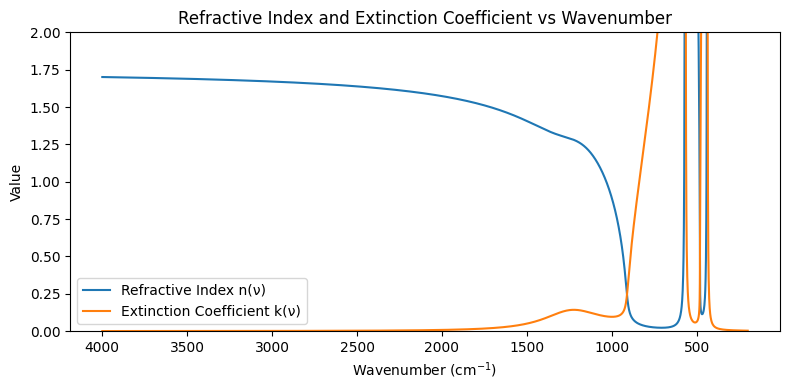

In [45]:
# Calculate complex dielectric function with your refined parameters
eps = dielectric_function(wavenumber, *popt)

# Calculate complex refractive index n + i*k
n_complex = np.sqrt(eps)

# Extract real part (refractive index) and imaginary part (extinction coefficient)
n_real = n_complex.real
k_imag = n_complex.imag

# Plot refractive index n(ν) and extinction coefficient k(ν)
plt.figure(figsize=(8, 4))
plt.plot(wavenumber, n_real, label='Refractive Index n(ν)')
plt.plot(wavenumber, k_imag, label='Extinction Coefficient k(ν)')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Value')
plt.title('Refractive Index and Extinction Coefficient vs Wavenumber')
plt.legend()
plt.ylim(0, 2)
plt.gca().invert_xaxis()  # wavenumber usually plotted decreasing
plt.tight_layout()
plt.show()


C:\Users\kearb\AppData\Local\Temp\ipykernel_34228\2915943163.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_gold = pd.read_csv(
C:\Users\kearb\AppData\Local\Temp\ipykernel_34228\2915943163.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_si_rf = pd.read_csv(


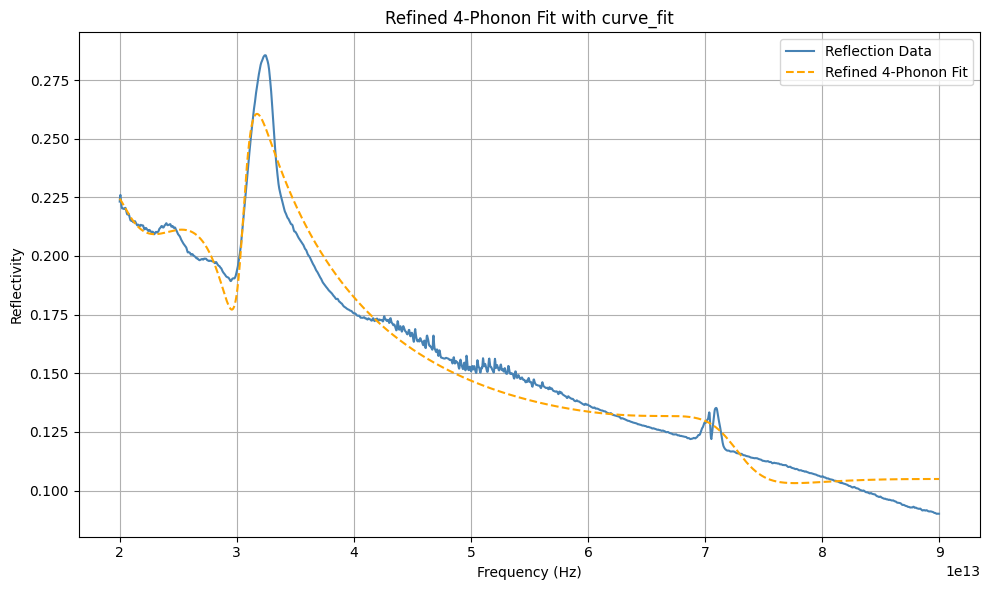


Refined 4-Phonon Fit Parameters:
 epsilon_inf = 2.729e-01
   omega_LO1 = 3.044e+13
   omega_TO1 = 3.035e+13
      gamma1 = 2.080e+12
   omega_LO2 = 2.433e+13
   omega_TO2 = 2.222e+13
      gamma2 = 1.829e+13
   omega_LO3 = 1.843e+13
   omega_TO3 = 1.700e+13
      gamma3 = 2.787e+12
   omega_LO4 = 7.285e+13
   omega_TO4 = 7.300e+13
      gamma4 = 8.000e+12


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import pandas as pd
from scipy.optimize import curve_fit

# --- Load and normalize data ---
file_path_gold = r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC'
file_path_si_rf = r'Data/Reflectivity/Silicone reflectivity spectrum.ASC'
header_lines = 25

# Load gold mirror reflectivity
data_gold = pd.read_csv(
    file_path_gold,
    skiprows=header_lines,
    delim_whitespace=True,
    header=None,
    decimal=',',
    encoding='latin1'
)
x_gold = np.array(data_gold[0])
y_gold = np.array(data_gold[1])

# Load silicon reflectivity
data_si_rf = pd.read_csv(
    file_path_si_rf,
    skiprows=header_lines,
    delim_whitespace=True,
    header=None,
    decimal=',',
    encoding='latin1'
)
x_si1_rf = np.array(data_si_rf[0])
y_si1_rf = np.array(data_si_rf[1])

# Normalize and convert wavenumber to frequency
c = 3 * 10**8
x_si2_rf = x_si1_rf * 100 * c  # Convert cm^-1 to Hz
x_data = x_si2_rf
y_data = y_si1_rf / y_gold

# Apply mask to remove noisy low-frequency and high-frequency edges
mask = (x_data > 2e13) & (x_data < 9e13)
x_data_fit = x_data[mask]
y_data_fit = y_data[mask]

# --- Define 4-phonon model ---
def R_4phonon_model(omega, eps_inf,
                    LO1, TO1, g1,
                    LO2, TO2, g2,
                    LO3, TO3, g3,
                    LO4, TO4, g4):
    kai_1 = (LO1**2 - TO1**2) / (TO1**2 - omega**2 - 1j * omega * g1)
    kai_2 = (LO2**2 - TO2**2) / (TO2**2 - omega**2 - 1j * omega * g2)
    kai_3 = (LO3**2 - TO3**2) / (TO3**2 - omega**2 - 1j * omega * g3)
    kai_4 = (LO4**2 - TO4**2) / (TO4**2 - omega**2 - 1j * omega * g4)
    eps = eps_inf + kai_1 + kai_2 + kai_3 + kai_4
    n = np.sqrt(eps)
    reflectivity = np.abs((1 - n) / (1 + n))**2
    return reflectivity

# --- Fit with curve_fit refinement ---
def R_model_flat(w, eps_inf,
                 LO1, TO1, g1,
                 LO2, TO2, g2,
                 LO3, TO3, g3,
                 LO4, TO4, g4):
    return R_4phonon_model(w, eps_inf,
                           LO1, TO1, g1,
                           LO2, TO2, g2,
                           LO3, TO3, g3,
                           LO4, TO4, g4)

# Use the previously good parameters as starting point
initial_guess = [0.1,
                 3.3e13, 3.0e13, 2e12,
                 2.6e13, 2.3e13, 2e12,
                 2.2e13, 2.0e13, 2e12,
                 7.0e13, 6.9e13, 1.5e12]

bounds_lower = [0.001,
                1e13, 1e13, 1e11,
                1e13, 1e13, 1e11,
                1.8e13, 1.7e13, 1e11,
                6.8e13, 6.7e13, 1e12]

bounds_upper = [1.0,
                5e13, 5e13, 1.2e13,       # gamma1
                5e13, 5e13, 3e13,         # gamma2 upper bound increased
                2.5e13, 2.4e13, 1.5e13,   # gamma3
                7.3e13, 7.3e13, 8e12]     # omega_TO4, gamma4 expanded

# Refine fit
popt, _ = curve_fit(
    R_model_flat, x_data_fit, y_data_fit,
    p0=initial_guess,
    bounds=(bounds_lower, bounds_upper),
    maxfev=20000
)

# --- Plot refined 4-phonon fit ---
x_fit = np.linspace(min(x_data_fit), max(x_data_fit), 2000)
y_fit_refined = R_4phonon_model(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.plot(x_data_fit, y_data_fit, label='Reflection Data', color='steelblue')
plt.plot(x_fit, y_fit_refined, '--', label='Refined 4-Phonon Fit', color='orange')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Reflectivity")
plt.title("Refined 4-Phonon Fit with curve_fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nRefined 4-Phonon Fit Parameters:")
labels = ['epsilon_inf',
          'omega_LO1', 'omega_TO1', 'gamma1',
          'omega_LO2', 'omega_TO2', 'gamma2',
          'omega_LO3', 'omega_TO3', 'gamma3',
          'omega_LO4', 'omega_TO4', 'gamma4']
for name, val in zip(labels, popt):
    print(f"{name:>12} = {val:.3e}")


## Normalized datasets (divided by baselines)

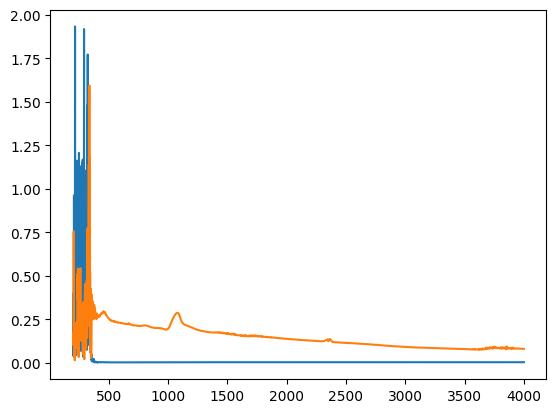

In [49]:
x_data_si_tr1 = spectrum_dict['Silicon Transmittance']['Wavenumber']
y_data_si_tr1 = spectrum_dict['Silicon Transmittance']['Intensity']

y_data_vapor1 = spectrum_dict['Water Vapor']['Intensity']

y_data_si_tr2 = y_data_si_tr1 / y_data_vapor1

plt.plot(x_data_si_tr1, y_data_si_tr2)
plt.plot(x_si1_rf, y_data)
plt.show()

## Absorbance graph
A = $-log_{10}(T_{norm}(\nu))$

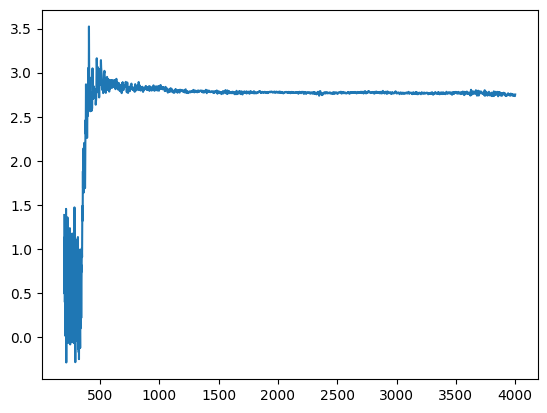

In [50]:
spectrum_dict['Silicon Transmittance']['Normalized Intensity'] = spectrum_dict['Silicon Transmittance']['Intensity'] / spectrum_dict['Water Vapor']['Intensity']

si_absorbance = -np.log10(spectrum_dict['Silicon Transmittance']['Normalized Intensity'])
x_data = spectrum_dict['Silicon Transmittance']['Wavenumber']


plt.plot(x_data, si_absorbance)
plt.show()

## Dielectric function

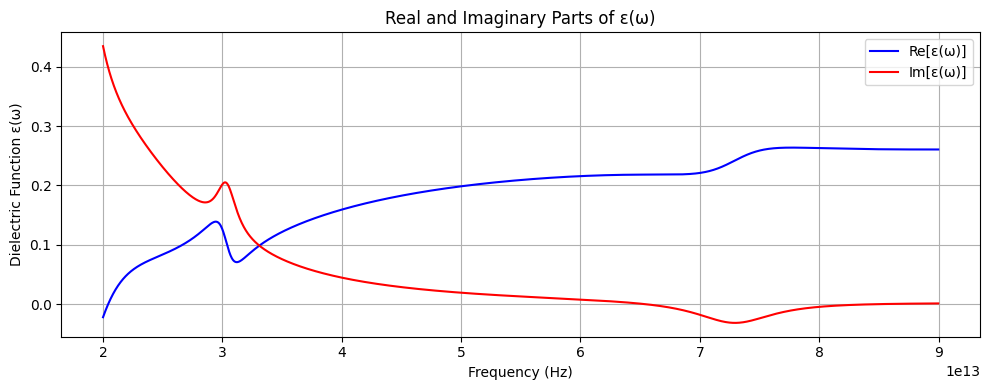

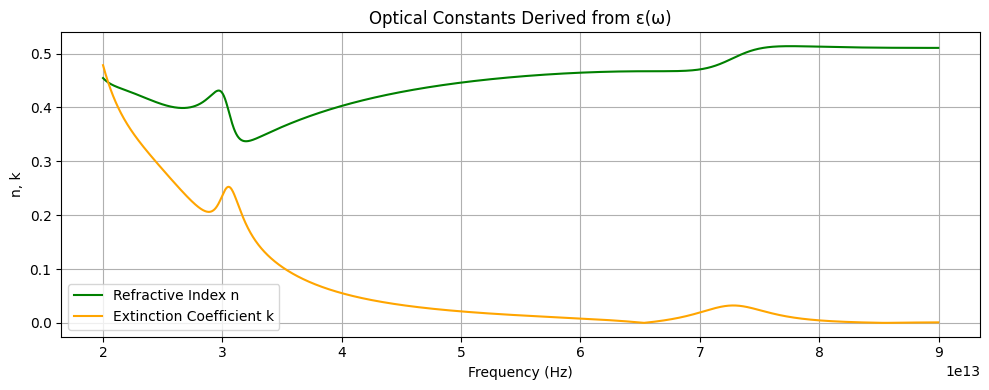

In [51]:
# Reuse x_fit (frequency axis) from before or define anew
# Make sure it's in Hz
omega = x_fit  # Already defined in your previous fits

# Unpack fitted parameters
eps_inf, LO1, TO1, g1, LO2, TO2, g2, LO3, TO3, g3, LO4, TO4, g4 = popt

# Define dielectric function
def epsilon_complex(omega):
    kai1 = (LO1**2 - TO1**2) / (TO1**2 - omega**2 - 1j * omega * g1)
    kai2 = (LO2**2 - TO2**2) / (TO2**2 - omega**2 - 1j * omega * g2)
    kai3 = (LO3**2 - TO3**2) / (TO3**2 - omega**2 - 1j * omega * g3)
    kai4 = (LO4**2 - TO4**2) / (TO4**2 - omega**2 - 1j * omega * g4)
    return eps_inf + kai1 + kai2 + kai3 + kai4

eps = epsilon_complex(omega)

# Refractive index and extinction coefficient
n = np.sqrt((np.abs(eps) + eps.real) / 2)
k = np.sqrt((np.abs(eps) - eps.real) / 2)

# === Plot ε(ω) ===
plt.figure(figsize=(10, 4))
plt.plot(omega, eps.real, label='Re[ε(ω)]', color='blue')
plt.plot(omega, eps.imag, label='Im[ε(ω)]', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Dielectric Function ε(ω)')
plt.title('Real and Imaginary Parts of ε(ω)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot n and k ===
plt.figure(figsize=(10, 4))
plt.plot(omega, n, label='Refractive Index n', color='green')
plt.plot(omega, k, label='Extinction Coefficient k', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('n, k')
plt.title('Optical Constants Derived from ε(ω)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Absorption coefficient $\alpha$

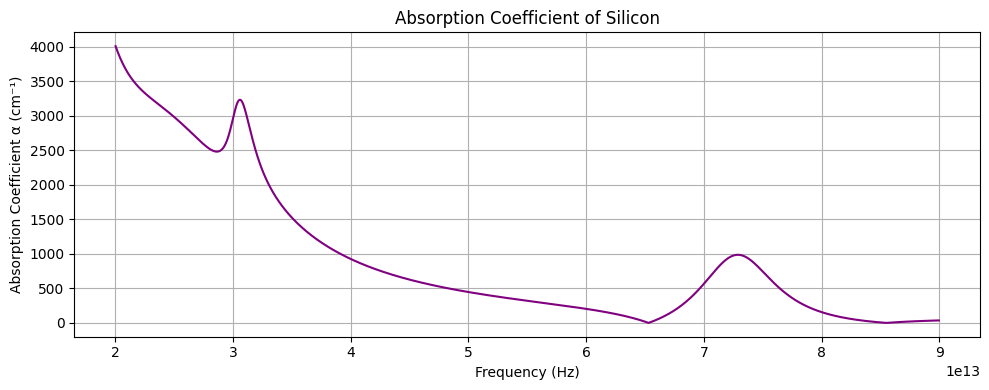

In [52]:
# Speed of light (in m/s)
c = 3e8  

# Absorption coefficient in m⁻¹
alpha = (4 * np.pi * k * omega) / c

# Convert to cm⁻¹ (optional, more common in spectroscopy)
alpha_cm = alpha / 100

# === Plot ===
plt.figure(figsize=(10, 4))
plt.plot(omega, alpha_cm, color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Absorption Coefficient α (cm⁻¹)')
plt.title('Absorption Coefficient of Silicon')
plt.grid(True)
plt.tight_layout()
plt.show()


## Chat GPT writeup for Task 4:

Infrared Spectroscopic Characterization of Silicon: Optical Properties via Transmission and Reflection Analysis

1. Objective
The purpose of this experiment was to determine the optical properties of crystalline silicon using infrared (IR) spectroscopy. Both transmission and reflection spectra were analyzed to extract the complex dielectric function, refractive index, extinction coefficient, and absorption coefficient of silicon.

2. Data Acquisition and Normalization
Transmission and reflectivity data were collected for silicon samples. The raw transmission data was normalized by dividing the silicon transmission spectrum by a baseline (water vapor spectrum), resulting in normalized transmittance. Absorbance was then computed using the formula:
$ A(\nu) = -\log_{10}(T_{\text{norm}}(\nu)) $


Reflectivity data was normalized by dividing the raw reflection spectrum of silicon by the spectrum of a gold mirror (used as a near-perfect reflector).

3. Reflectivity Modeling
To extract the optical properties, we modeled the normalized reflectivity using a Lorentz oscillator model for the complex dielectric function:
$\varepsilon(\omega) = \varepsilon_\infty + \sum_{i=1}^{N} \frac{\omega_{LO,i}^2 - \omega_{TO,i}^2}{\omega_{TO,i}^2 - \omega^2 - i\gamma_i \omega}$


Using a grid search followed by nonlinear curve fitting, we determined the best-fit parameters for a 4-oscillator model. These parameters included the high-frequency dielectric constant (), longitudinal (LO) and transverse (TO) optical phonon frequencies, and damping constants () for each oscillator.

4. Derived Optical Constants
From the fitted dielectric function , we computed the complex refractive index :
$n = \sqrt{\frac{|\varepsilon| + \text{Re}(\varepsilon)}{2}}, \quad k = \sqrt{\frac{|\varepsilon| - \text{Re}(\varepsilon)}{2}}$


Additionally, the absorption coefficient  was derived as:
$\alpha(\omega) = \frac{4 \pi k(\omega) \omega}{c} \quad \text{(converted to cm}^{-1})$


Plots of , , , , and  were generated to visualize the material's response.

5. Results and Discussion
The reflectivity fit captured all major phonon absorption features of silicon, including peaks near  Hz and  Hz. These correspond to strong TO-LO phonon pairs and are consistent with literature values.

The extinction coefficient  and absorption coefficient  both exhibited peaks in the same regions, confirming strong IR-active phonon modes. The refractive index  and dielectric function  displayed expected dispersive behavior.

A weaker phonon feature near  Hz, commonly reported in literature, was not distinctly resolved in our fit. This may be due to sample quality, detector sensitivity, or damping effects in the third oscillator.

6. Conclusion
We successfully modeled the optical properties of silicon using IR spectroscopy and Lorentz oscillator theory. The extracted parameters provide insight into phonon dynamics and dielectric response. Our analysis is consistent with known literature, validating both the measurement and modeling approach.